In [1]:
import tensorflow as tf
import keras

print(tf.__version__)
print(keras.__version__)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


1.1.0
2.1.2


In [3]:
import numpy as np
import pandas as pd
# 转换成独热编码的时候使用
from keras.utils import np_utils

np.random.seed(10)

from keras.datasets import mnist

(X_train_image, y_train_label), (X_test_image, y_test_label) = mnist.load_data()

print(len(X_train_image), len(X_test_image))
print(len(y_train_label), len(y_test_label))

60000 10000
60000 10000


ls /Users/liwei/.keras/datasets/

In [4]:
X_train_image.shape, X_test_image.shape, y_train_label.shape, y_test_label.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [9]:
import matplotlib.pyplot as plt


def plot_image(image):
    figure = plt.gcf()
    figure.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

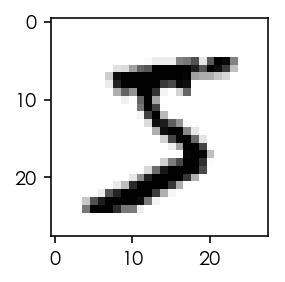

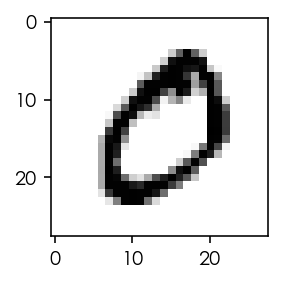

(None, None)

In [13]:
plot_image(X_train_image[0]), plot_image(X_train_image[1])

In [12]:
y_train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [24]:
def plot_images_labels_predict(images, labels, prediction, num=10):

    # 设置显示图形的大小
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25:
        num = 25

    for i in range(num):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(images[i], cmap='binary')
        title = "label=" + str(labels[i])

        if len(prediction) > 0:
            title += ",prediction" + str(prediction[i])

        ax.set_title(title, fontsize=14)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

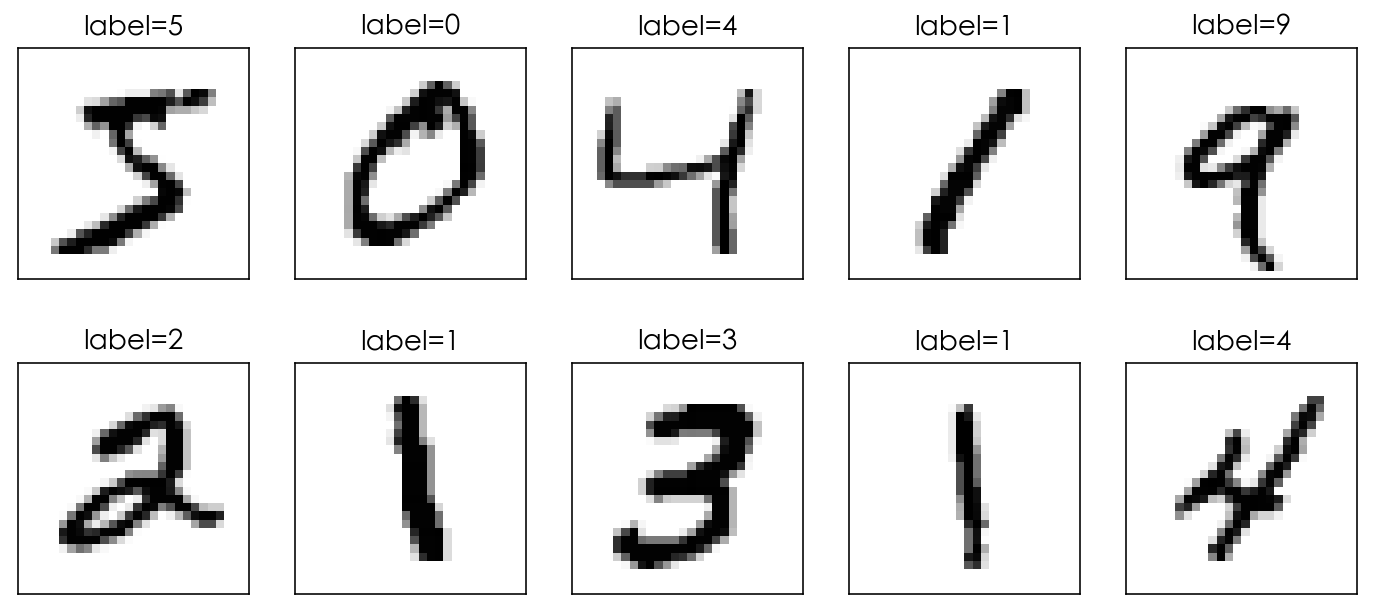

In [26]:
plot_images_labels_predict(X_train_image, y_train_label, [], 10)

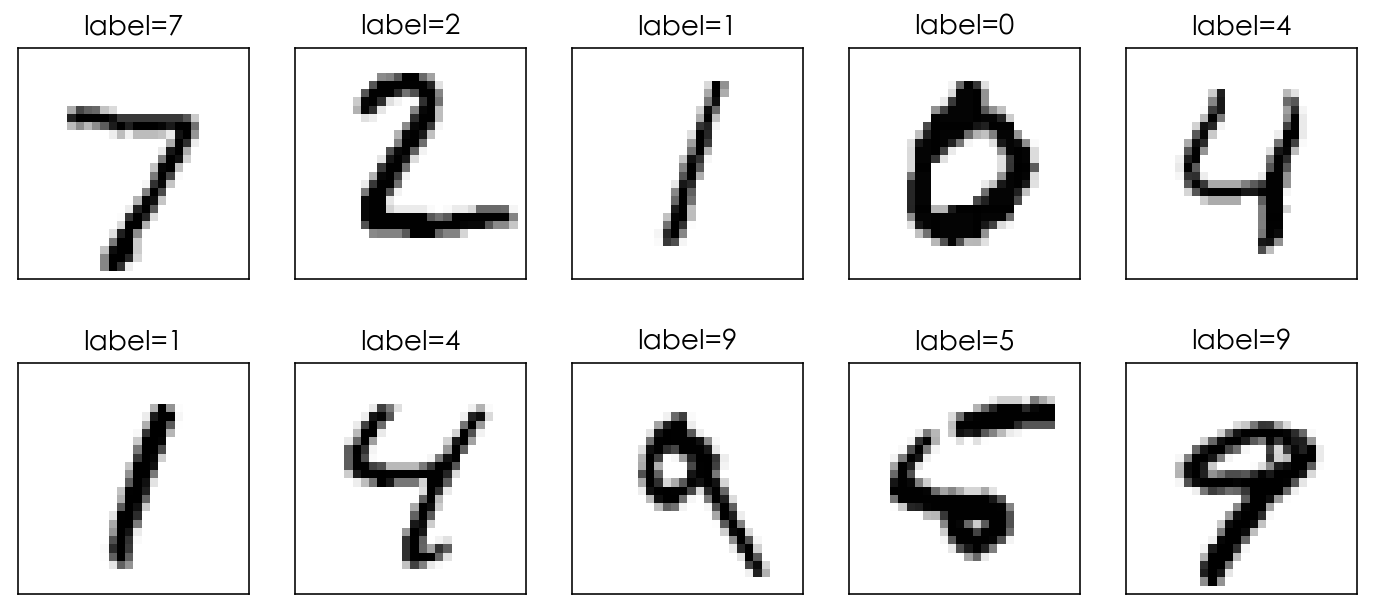

In [27]:
plot_images_labels_predict(X_test_image, y_test_label, [], 10)

## feature 特征预处理

### 转换为一维向量，注意，这里要将特征转化为 float32 类型

In [29]:
X_Train = X_train_image.reshape(-1, 28 * 28).astype('float32')
X_Test = X_test_image.reshape(-1, 28 * 28).astype('float32')

In [31]:
X_Train.shape, X_Test.shape

((60000, 784), (10000, 784))

### 标准化

In [32]:
X_Train_normalize = X_Train / 255
X_Test_normalize = X_Test / 255

## label 数据预处理

In [36]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [5]:
y_train_one_hot = np_utils.to_categorical(y_train_label)
y_test_one_hot = np_utils.to_categorical(y_test_label)
print(y_train_label.shape, y_train_one_hot.shape)
print(y_test_label.shape, y_test_one_hot.shape)

(60000,) (60000, 10)
(10000,) (10000, 10)


## 使用多元感知机识别

### 建立模型

In [50]:
28 * 28

784

In [6]:
from keras.models import Sequential
from keras.layers import Dense

# 建立一个线性堆叠模型，后续，我们只要使用 model.add() 方法将各个神经网络层加入模型就可以了
model = Sequential()

### 建立“输入层”与“隐藏层”（这里“输入层”与“隐藏层”是一起建立的）

+ kernel_initializer 表示：使用正态分布 normal distribution 的随机数来初始化 weight 和 bias
+ activation 表示：定义激活函数，这里是 relu 激活函数

In [7]:
# units=256 表示隐藏层设置 256 个神经元
# input_dim 输入层的神经元个数为 784
model.add(Dense(units=256, input_dim=784,
                kernel_initializer='normal', activation='relu'))

### 建立输出层

+ 这里使用 softmax 激活函数进行转换，softmax 可以将神经元的输出转换为预测每一个数字的概率。

In [8]:
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

### 查看模型的摘要

+ “输入层”与“隐藏层”是一起建立的，所以没有显示“输入层”

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [11]:
(784 + 1) * 256, (256 + 1) * 10, 200960 + 2570

(200960, 2570, 203530)

### 解读参数的个数

$200960 = (784 + 1) \times 256$

$2570 = (256 + 1) \times 10$

Trainable params: 203,530 

**注意：计算偏置的时候，偏置归入上一层。**

In [66]:
784 * 256 + 256, (784 + 1) * 256 

(200960, 200960)

In [67]:
256 * 10 + 10, (256 + 1) * 10

(2570, 2570)

In [64]:
200960 + 2570

203530

## 定义训练方式

In [69]:
# 交叉熵损失函数
# 使用 adam 优化器，使得收敛更快
# 评估模型的方式是准确率
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

+ verbose=2 显示训练过程
+ epochs=10 执行了 10 个训练周期
+ batch_size=200 每一个批次输入 200 个数据

In [71]:
train_history = model.fit(x=X_Train_normalize, y=y_train_one_hot,
                          validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.4381 - acc: 0.8844 - val_loss: 0.2210 - val_acc: 0.9414
Epoch 2/10
 - 1s - loss: 0.1951 - acc: 0.9446 - val_loss: 0.1571 - val_acc: 0.9586
Epoch 3/10
 - 1s - loss: 0.1393 - acc: 0.9604 - val_loss: 0.1322 - val_acc: 0.9652
Epoch 4/10
 - 1s - loss: 0.1066 - acc: 0.9696 - val_loss: 0.1143 - val_acc: 0.9668
Epoch 5/10
 - 1s - loss: 0.0842 - acc: 0.9760 - val_loss: 0.1030 - val_acc: 0.9706
Epoch 6/10
 - 1s - loss: 0.0698 - acc: 0.9800 - val_loss: 0.0971 - val_acc: 0.9703
Epoch 7/10
 - 1s - loss: 0.0575 - acc: 0.9838 - val_loss: 0.0918 - val_acc: 0.9718
Epoch 8/10
 - 1s - loss: 0.0479 - acc: 0.9868 - val_loss: 0.0858 - val_acc: 0.9745
Epoch 9/10
 - 1s - loss: 0.0395 - acc: 0.9892 - val_loss: 0.0806 - val_acc: 0.9761
Epoch 10/10
 - 1s - loss: 0.0330 - acc: 0.9916 - val_loss: 0.0827 - val_acc: 0.9745


In [72]:
import matplotlib.pyplot as plt


def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

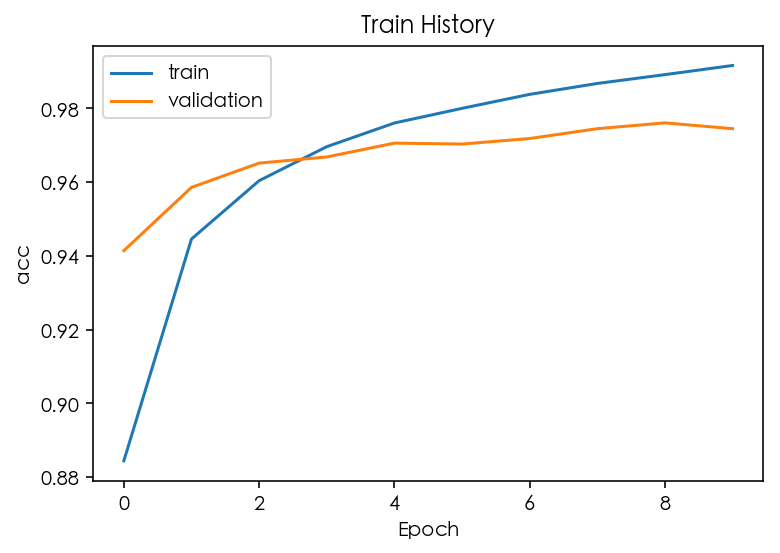

In [74]:
# val_acc 表示验证集的准确率
show_train_history(train_history, 'acc', 'val_acc')

## 用测试数据评估模型的准确率

In [75]:
# 这个方法用于评估模型的准确率
scores = model.evaluate(X_Test_normalize, y_test_one_hot)

10000/10000 [==============================] - 0s 12us/step


In [78]:
scores

[0.07320330831496977, 0.9776]

In [77]:
scores[1]

0.9776

### 进行预测

In [79]:
prediction = model.predict_classes(X_Test_normalize)

In [80]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [81]:
y_test_label

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

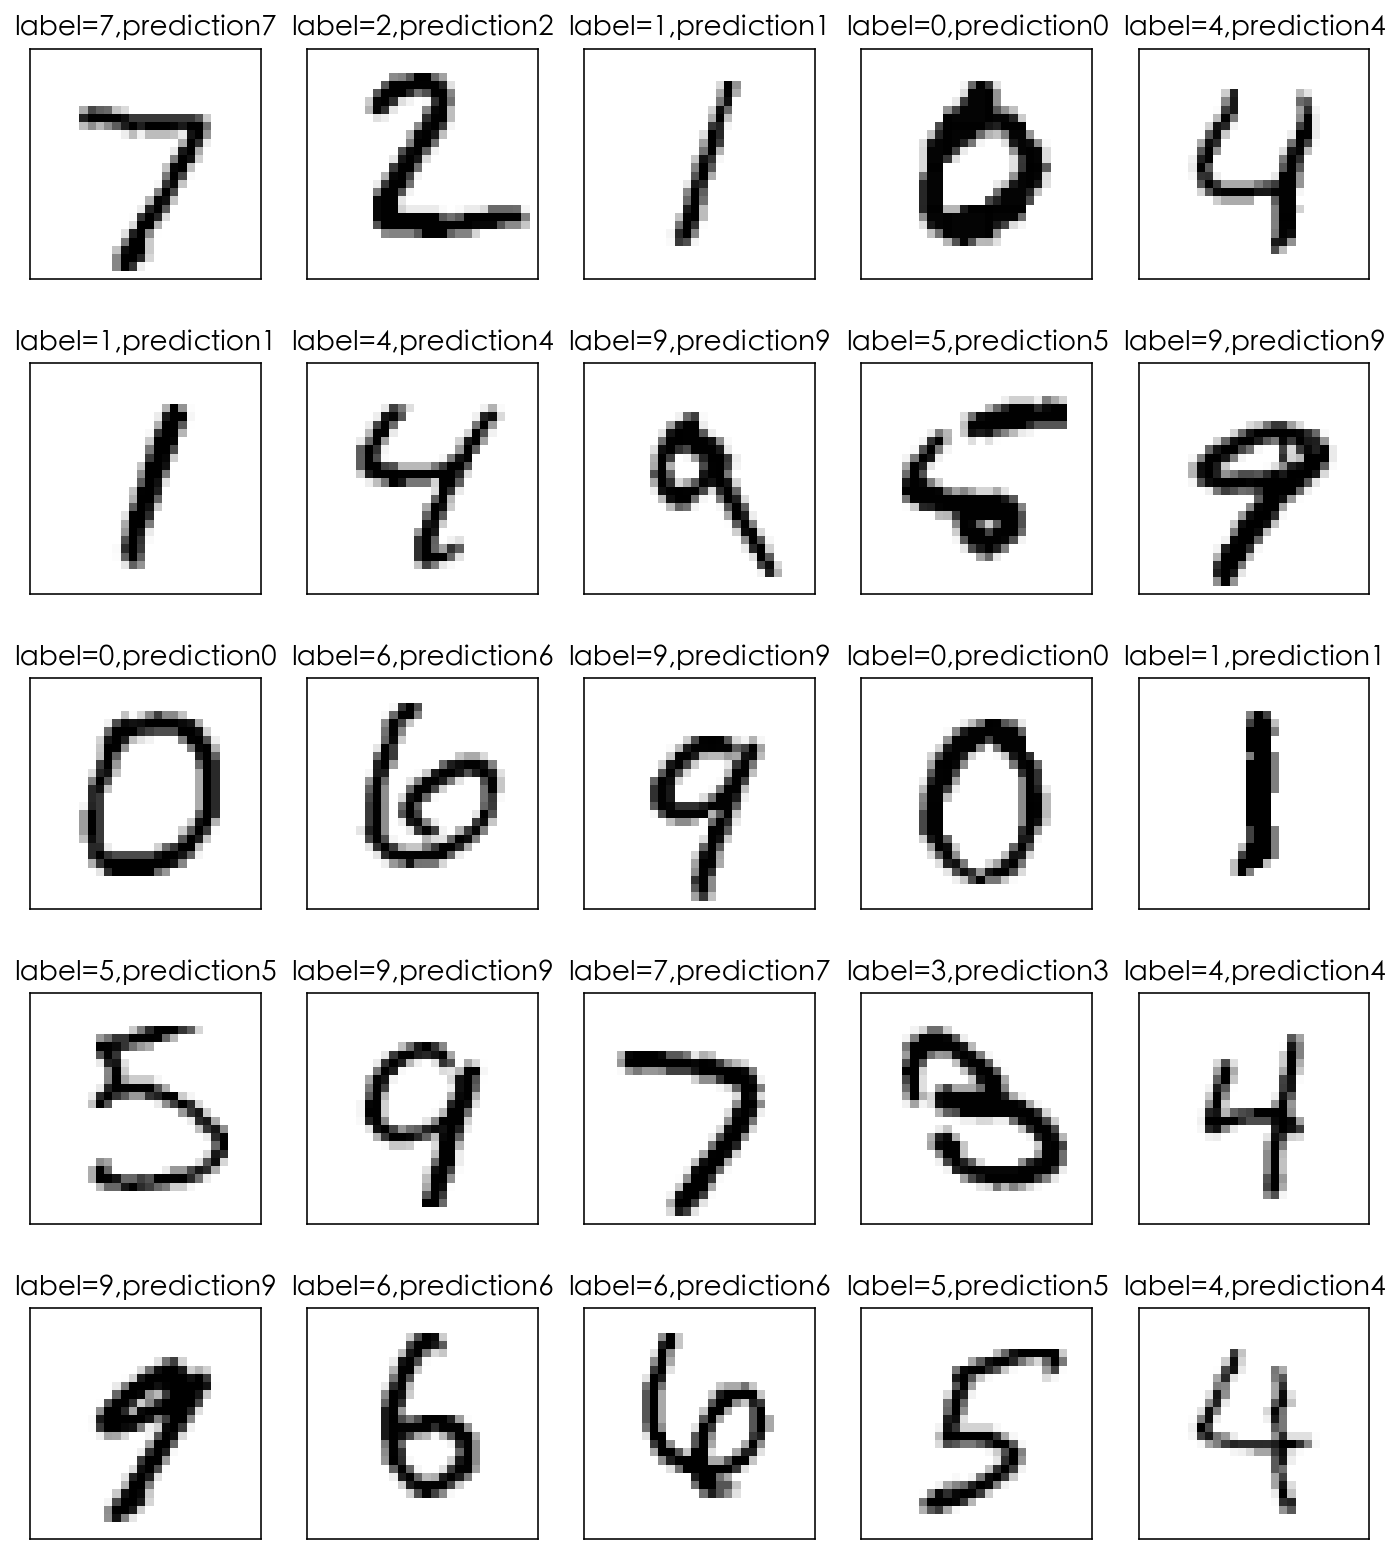

In [82]:
plot_images_labels_predict(X_test_image, y_test_label, prediction, 25)

### 显示混淆矩阵

+ 使用 `pd.crosstab` 建立混淆矩阵

In [83]:
import pandas as pd

pd.crosstab(y_test_label, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,963,0,1,3,1,4,3,0,1,4
1,0,1125,3,0,0,1,2,0,4,0
2,5,0,1005,6,3,0,4,4,5,0
3,0,0,0,996,0,3,0,3,4,4
4,1,0,2,1,956,0,6,3,0,13
5,2,0,0,9,0,873,5,0,2,1
6,5,3,1,1,3,5,937,0,3,0
7,0,4,8,3,0,0,0,1003,0,10
8,3,1,5,9,2,9,1,2,937,5


In [84]:
df = pd.DataFrame({'label': y_test_label, 'predict': prediction})

In [86]:
df[:5]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [87]:
df[(df['label'] == 5) & (df['predict'] == 3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
3902,5,3
4271,5,3
4355,5,3
5937,5,3
9427,5,3


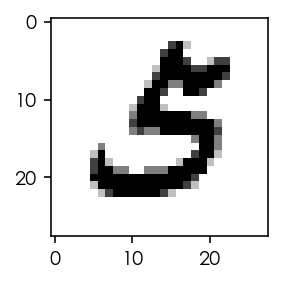

(None, 5)

In [90]:
plot_image(X_test_image[9427]), y_test_label[9427]

## 为了增加多层感知机模型的准确率，使用隐藏层是 1000 个神经元

+ 隐藏层数量越多，模型越复杂，那么过拟合的风险就越高

In [95]:
model2 = Sequential()

### 将输入层与隐藏层加入模型

In [96]:
model2.add(Dense(units=1000, input_dim=784,
                 kernel_initializer='normal', activation='relu'))

### 将输出层加入模型

In [97]:
model2.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

### 查看模型的摘要

In [98]:
print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [102]:
model2.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [103]:
train_history2 = model2.fit(x=X_Train_normalize, y=y_train_one_hot,
                            validation_split=.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 4s - loss: 0.2964 - acc: 0.9155 - val_loss: 0.1525 - val_acc: 0.9571
Epoch 2/10
 - 3s - loss: 0.1203 - acc: 0.9650 - val_loss: 0.1087 - val_acc: 0.9678
Epoch 3/10
 - 3s - loss: 0.0736 - acc: 0.9790 - val_loss: 0.0921 - val_acc: 0.9730
Epoch 4/10
 - 4s - loss: 0.0510 - acc: 0.9856 - val_loss: 0.0814 - val_acc: 0.9760
Epoch 5/10
 - 4s - loss: 0.0359 - acc: 0.9904 - val_loss: 0.0789 - val_acc: 0.9752
Epoch 6/10
 - 4s - loss: 0.0265 - acc: 0.9933 - val_loss: 0.0784 - val_acc: 0.9759
Epoch 7/10
 - 4s - loss: 0.0187 - acc: 0.9959 - val_loss: 0.0743 - val_acc: 0.9777
Epoch 8/10
 - 4s - loss: 0.0129 - acc: 0.9974 - val_loss: 0.0842 - val_acc: 0.9753
Epoch 9/10
 - 4s - loss: 0.0100 - acc: 0.9981 - val_loss: 0.0686 - val_acc: 0.9793
Epoch 10/10
 - 4s - loss: 0.0067 - acc: 0.9992 - val_loss: 0.0758 - val_acc: 0.9787


+ 可以看到：“训练数据集”上的准确度比“验证数据集”的准确度高，过拟合更严重

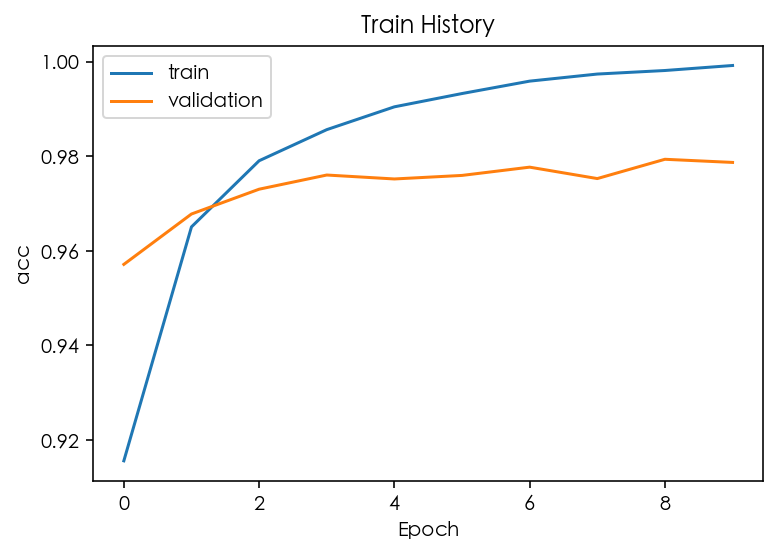

In [104]:
# val_acc 表示验证集的准确率
show_train_history(train_history2, 'acc', 'val_acc')

In [105]:
scores = model2.evaluate(X_Test_normalize, y_test_one_hot)

10000/10000 [==============================] - 0s 23us/step


In [106]:
scores

[0.0697214992457244, 0.9784]

## 我们加入 DropOut 功能防止过拟合

In [12]:
from keras.layers import Dropout

model3 = Sequential()

model3.add(Dense(units=1000, input_dim=784,
                 kernel_initializer='normal', activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
print(model3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [109]:
model3.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
train_history3 = model3.fit(x=X_Train_normalize, y=y_train_one_hot,
                            validation_split=.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 5s - loss: 0.3542 - acc: 0.8946 - val_loss: 0.1627 - val_acc: 0.9547
Epoch 2/10
 - 5s - loss: 0.1608 - acc: 0.9520 - val_loss: 0.1165 - val_acc: 0.9660
Epoch 3/10
 - 5s - loss: 0.1170 - acc: 0.9662 - val_loss: 0.1017 - val_acc: 0.9691
Epoch 4/10
 - 5s - loss: 0.0892 - acc: 0.9736 - val_loss: 0.0877 - val_acc: 0.9737
Epoch 5/10
 - 5s - loss: 0.0761 - acc: 0.9764 - val_loss: 0.0833 - val_acc: 0.9756
Epoch 6/10
 - 5s - loss: 0.0626 - acc: 0.9809 - val_loss: 0.0749 - val_acc: 0.9774
Epoch 7/10
 - 5s - loss: 0.0542 - acc: 0.9827 - val_loss: 0.0729 - val_acc: 0.9783
Epoch 8/10
 - 5s - loss: 0.0473 - acc: 0.9857 - val_loss: 0.0721 - val_acc: 0.9781
Epoch 9/10
 - 5s - loss: 0.0411 - acc: 0.9873 - val_loss: 0.0696 - val_acc: 0.9793
Epoch 10/10
 - 5s - loss: 0.0381 - acc: 0.9880 - val_loss: 0.0674 - val_acc: 0.9799


Epoch 10/10
 - 5s - loss: 0.0381 - acc: 0.9880 - val_loss: 0.0674 - val_acc: 0.9799
 
 
相差不大，说明改善了过渡拟合的问题。

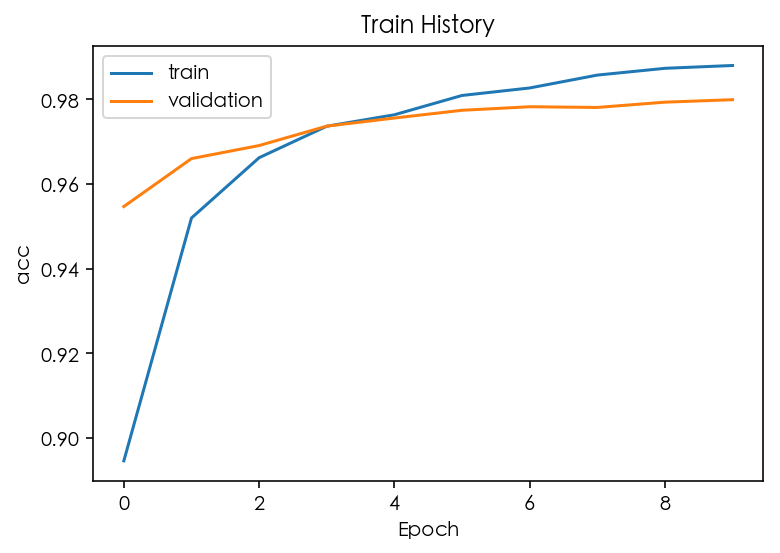

In [110]:
# val_acc 表示验证集的准确率
show_train_history(train_history3, 'acc', 'val_acc')

In [111]:
scores = model3.evaluate(X_Test_normalize, y_test_one_hot)

10000/10000 [==============================] - 0s 48us/step


In [112]:
scores

[0.06186769869677955, 0.9808]

## 增加隐藏层

In [13]:
from keras.layers import Dropout

model4 = Sequential()

model4.add(Dense(units=1000, input_dim=784,
                 kernel_initializer='normal', activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(units=1000, input_dim=784,
                 kernel_initializer='normal', activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
print(model4.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [114]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
train_history4 = model4.fit(x=X_Train_normalize, y=y_train_one_hot,
                            validation_split=.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 12s - loss: 0.3683 - acc: 0.8849 - val_loss: 0.1360 - val_acc: 0.9595
Epoch 2/10
 - 11s - loss: 0.1603 - acc: 0.9513 - val_loss: 0.0978 - val_acc: 0.9699
Epoch 3/10
 - 12s - loss: 0.1188 - acc: 0.9625 - val_loss: 0.0862 - val_acc: 0.9738
Epoch 4/10
 - 11s - loss: 0.0995 - acc: 0.9679 - val_loss: 0.0796 - val_acc: 0.9776
Epoch 5/10
 - 11s - loss: 0.0861 - acc: 0.9727 - val_loss: 0.0740 - val_acc: 0.9782
Epoch 6/10
 - 11s - loss: 0.0736 - acc: 0.9765 - val_loss: 0.0771 - val_acc: 0.9780
Epoch 7/10
 - 12s - loss: 0.0668 - acc: 0.9784 - val_loss: 0.0750 - val_acc: 0.9786
Epoch 8/10
 - 12s - loss: 0.0606 - acc: 0.9801 - val_loss: 0.0728 - val_acc: 0.9790
Epoch 9/10
 - 12s - loss: 0.0563 - acc: 0.9808 - val_loss: 0.0765 - val_acc: 0.9789
Epoch 10/10
 - 12s - loss: 0.0509 - acc: 0.9833 - val_loss: 0.0749 - val_acc: 0.9798


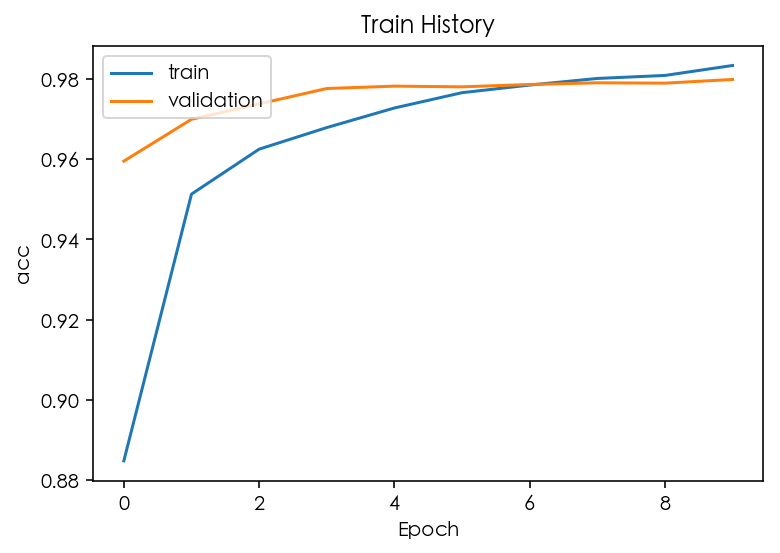

In [115]:
# val_acc 表示验证集的准确率
show_train_history(train_history4, 'acc', 'val_acc')

In [116]:
scores = model4.evaluate(X_Test_normalize, y_test_one_hot)

10000/10000 [==============================] - 1s 93us/step


In [117]:
scores

[0.06347146609500123, 0.9811]